In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [ ]:
DATASET = 'ita_teleco'
SEED = 42
N = 100
SEQ = 6

In [ ]:
tf.random.set_seed(SEED)
np.random.seed(SEED)
plt.rcParams['figure.figsize'] = [10, 8]

In [ ]:
def load_data(seq_len, n):
    csv = f'out/{DATASET}/data/ts_real_fake.csv'

    data = pd.read_csv(csv)

    real = data.real
    real = real.to_numpy()[:n * seq_len]
    real = np.reshape(real, (-1, seq_len))
    real = MinMaxScaler().fit_transform(real)

    fake = data.fake
    fake = fake.to_numpy()[:n * seq_len]
    fake = np.reshape(fake, (-1, seq_len))
    fake = MinMaxScaler().fit_transform(fake)

    return real, fake

In [ ]:
def fig_path(fig_name): return f'out/{DATASET}/figures/DBSCAN_{fig_name}'

In [ ]:
real, fake = load_data(SEQ, N)
rand = np.random.rand(N, SEQ)

In [ ]:
dataX = np.vstack((real, rand))
np.random.shuffle(dataX)

db = DBSCAN(eps=0.3, min_samples=6).fit(dataX)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = dataX[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = dataX[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.savefig(fig_path('real_random'))

Estimated number of clusters: 2
Estimated number of noise points: 50


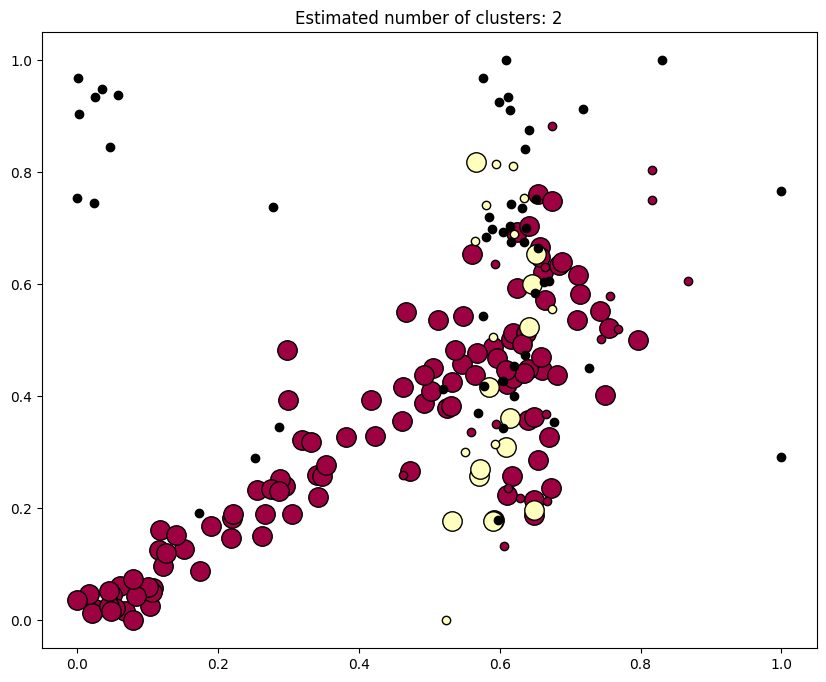

In [11]:
dataX = np.vstack((real, fake))
np.random.shuffle(dataX)

db = DBSCAN(eps=0.3, min_samples=6).fit(dataX)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = dataX[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = dataX[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.savefig(fig_path('real_fake'))